In [1]:
import pandas as pd
from plotting_csv import *
import matplotlib.colors as mcolors
from scipy.interpolate import make_interp_spline

        λ      μ       p      n  snr       MSE  null_risk       γ
0     1.0    1.0    20.0  200.0  1.0  1.128778   2.000802   0.100
1     1.0    1.0    21.0  200.0  1.0  1.128783   2.007320   0.105
2     1.0    1.0    23.0  200.0  1.0  1.149887   2.019660   0.115
3     1.0    1.0    25.0  200.0  1.0  1.256217   2.019846   0.125
4     1.0    1.0    27.0  200.0  1.0  1.271016   2.030683   0.135
...   ...    ...     ...    ...  ...       ...        ...     ...
1915  1.0  100.0  1455.0  200.0  5.0  5.406319   6.473349   7.275
1916  1.0  100.0  1576.0  200.0  5.0  5.456880   6.913555   7.880
1917  1.0  100.0  1706.0  200.0  5.0  5.503255   6.609448   8.530
1918  1.0  100.0  1847.0  200.0  5.0  5.583017   6.341238   9.235
1919  1.0  100.0  2000.0  200.0  5.0  5.627967   7.401335  10.000

[1920 rows x 8 columns]


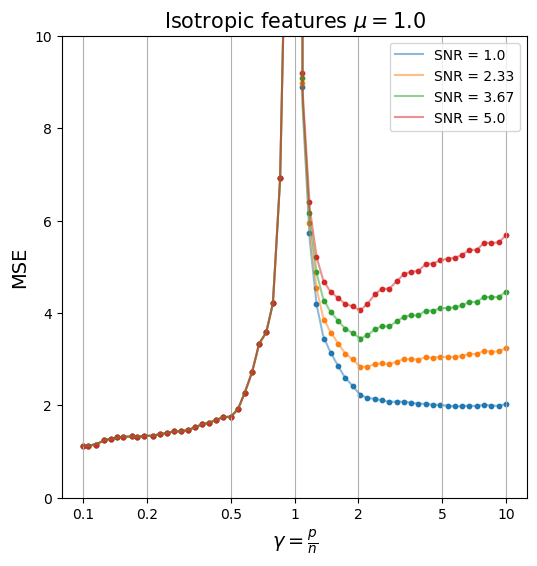

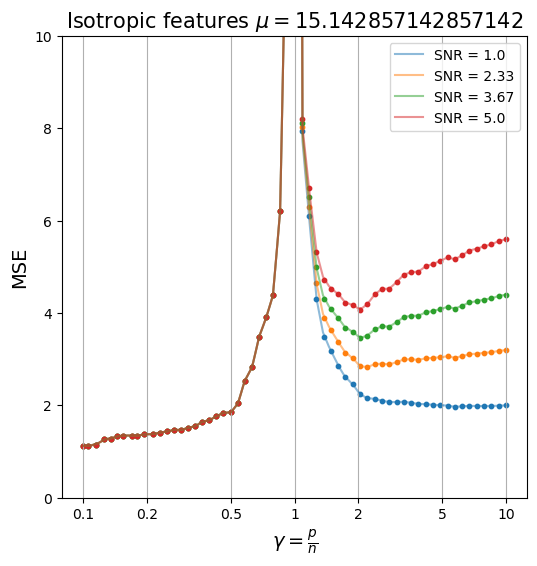

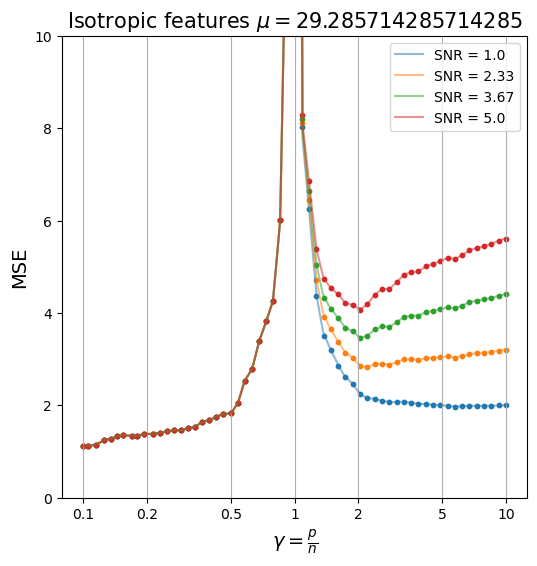

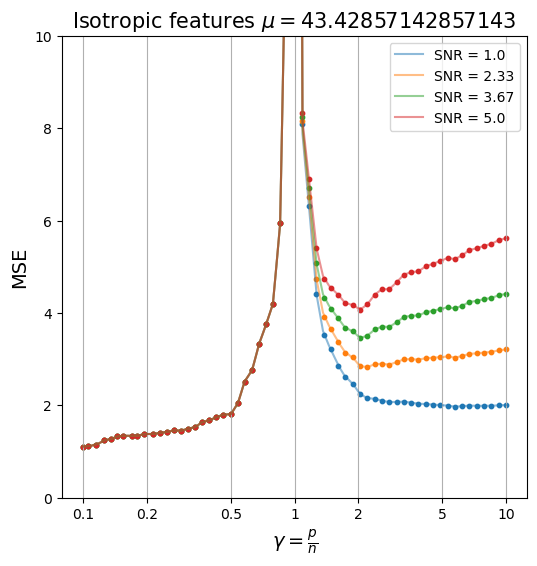

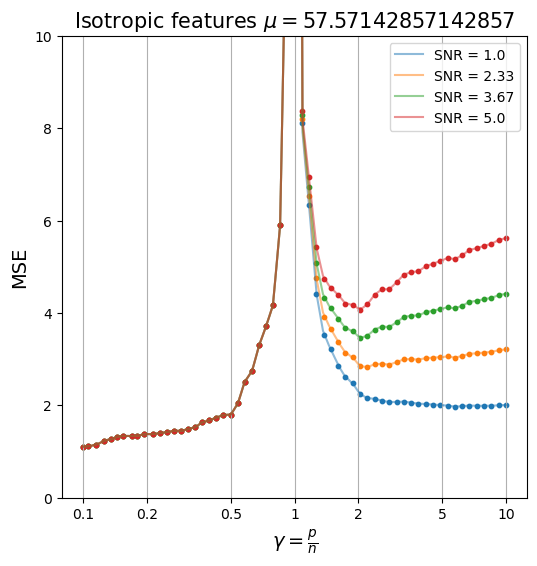

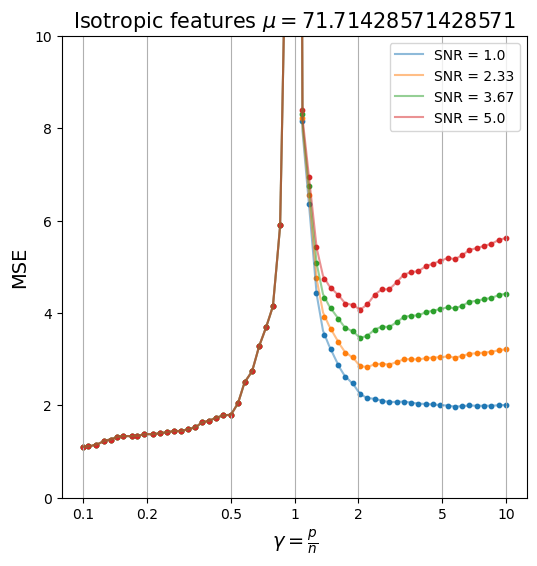

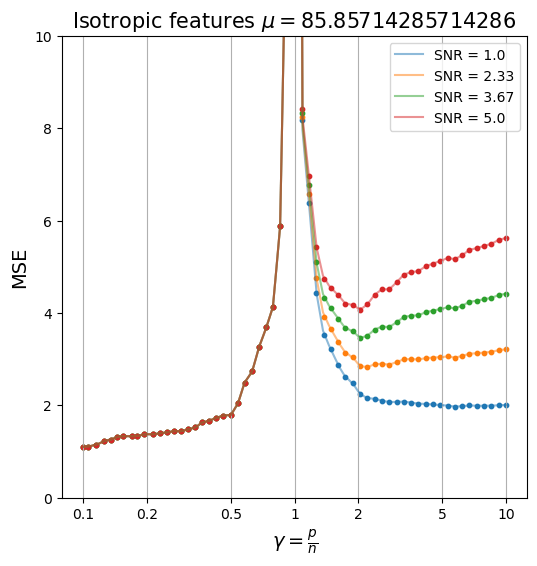

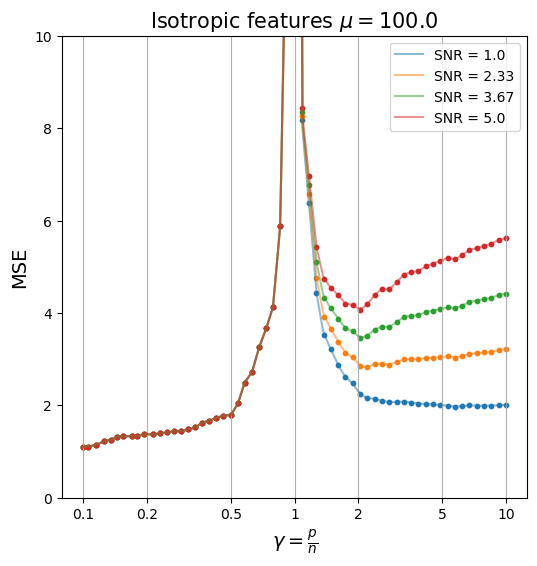

In [20]:
# Create the corrected plot with rotated and selectively displayed x-tick labels
file_name = '../results/Python/results_[14-09-2023_11:32:40-2355].csv'
df = pd.read_csv(file_name)
df.columns = ['λ','μ', "p", 'n', 'snr', 'MSE', 'null_risk']
df['γ'] = df['p'] / df['n']
print(df)
def symlog_transform(x):
    return np.log10(x) if x >= 1 else -np.log10(1/x)
for μ in df['μ'].unique():
    fig, ax = plt.subplots(figsize=(6, 6))
    df_μ = df[df['μ'] == μ]
    for i, snr in enumerate(df_μ['snr'].unique()):
        conditions = df_μ['snr'] == snr
        x = df_μ[conditions]
        y = df_μ[conditions]
        plt.scatter(list(map(symlog_transform, x['γ'])), y['MSE'], s=10, color = list(mcolors.TABLEAU_COLORS.keys())[i])

        x_gamma_s = x[x['γ'] <= 1]
        x_gamma_l = x[x['γ'] >= 1]
        y_gamma_s = y[y['γ'] <= 1]
        y_gamma_l = y[y['γ'] >= 1]

        x_ls = [x_gamma_s['γ'], x_gamma_l['γ']]
        y_ls = [y_gamma_s['MSE'], y_gamma_l['MSE']]


        for idx, xy in enumerate(zip(x_ls, y_ls)):
            x, y = xy
            spline_mse = make_interp_spline(x, y, k=1)
            if idx == 0:
                x_s = np.linspace(x.min(), 1, 100)
                y_s = spline_mse(x_s)
                plt.plot(list(map(symlog_transform, x_s)), y_s, alpha=0.5, color = list(mcolors.TABLEAU_COLORS.keys())[i], label=f'SNR = {round(snr, 2)}')
            if idx == 1:
                x_s = np.linspace(1, x.max(), 100)
                y_s = spline_mse(x_s)
                plt.plot(list(map(symlog_transform, x_s)), y_s, alpha=0.5, color = list(mcolors.TABLEAU_COLORS.keys())[i])

    # Selective x-ticks to avoid overlap
    selected_labels = [0.1, 0.2, 0.5, 1, 2, 5, 10]
    selected_ticks = list(map(symlog_transform, [0.1, 0.2, 0.5, 1, 2, 5, 10]))

    plt.xticks(selected_ticks, selected_labels)

    # Labels and title
    plt.xlabel('$\\gamma = \\frac{p}{n}$', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.title(f'Isotropic features $\\mu = {μ}$', fontsize=15)
    ax.xaxis.grid(True)
    plt.grid(True, which="minor", ls="--", c='gray')
    ax.set_ylim(0, 10)
    plt.legend()
    plt.show()